In [1]:
import os
from os.path import expanduser
import socket
import sys


# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
if running_system == systemLOCAL:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"Documents","projects", "pyfesom")
elif running_system[0:1] == "b" or running_system == systemHLRN:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"pyfesom")
else:
    print 'please configure your local machine : type socket.gethostname()'
print "working directory set to", wd_path
os.chdir(wd_path)
sys.path.append("codes/modules")
#########################################

computer =  blogin1
working directory set to /home/hbkoziel/pyfesom


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# AUTOMATIC DEFINITION OF PATHS

In [3]:
datapath = wd_path+'/data/'
savepath    = wd_path+'/figures/insitu/'

# loading the data

In [5]:
BSO_obs = datapath+'BSO_nuts/BSO_nutrients_1980-2016_light.csv'
print BSO_obs
df_obs = pd.read_csv(BSO_obs, header=0, sep = ';',na_values=[''], decimal=",", index_col='time', parse_dates=True)
df_obs.head()

/home/hbkoziel/pyfesom/data/BSO_nuts/BSO_nutrients_1980-2016_light.csv


,Cruise,Station,lon,lat,Bot_Depth,Depth,po,Si,N
time,,,,,,,,,
1980-06-22 11:00:00,1980005,558,20.0,70.5,129,0.0,0.31,2.2,1.2
1980-06-22 11:00:00,1980005,558,20.0,70.5,129,5.0,0.26,2.1,1.2
1980-06-22 11:00:00,1980005,558,20.0,70.5,129,10.0,0.28,2.2,1.2
1980-06-22 11:00:00,1980005,558,20.0,70.5,129,20.0,0.27,2.2,1.2
1980-06-22 11:00:00,1980005,558,20.0,70.5,129,30.0,0.27,2.2,1.3


In [6]:
BSO_DIN_model = datapath+'BSO_nuts/BSO_DIN_model.csv'
df_model_din = pd.read_csv(BSO_DIN_model, header=0, sep = ',',na_values=[''], decimal=".", index_col='time', parse_dates=True)
df_model_din.head()

,DIN_0_50m,DIN_50_500m,DIN_ALL_DEPTHS
time,,,
1980-01-01,7.858942,8.320708,8.168765
1980-02-01,8.169571,8.380021,8.308295
1980-03-01,8.598617,8.644801,8.643616
1980-04-01,9.089741,9.084117,9.106010
1980-05-01,5.776280,9.166707,7.874260


In [62]:
BSO_DSI_model = datapath+'BSO_nuts/BSO_DSI_model.csv'
df_model_dsi = pd.read_csv(BSO_DSI_model, header=0, sep = ',',na_values=[''], decimal=".", index_col='time', parse_dates=True)
df_model_dsi.head()

,DSI_0_50m,DSI_50_500m,DSI_ALL_DEPTHS
time,,,
1980-01-01,4.718152,4.919092,4.852011
1980-02-01,4.787200,4.870354,4.841335
1980-03-01,4.920620,4.936195,4.933035
1980-04-01,5.075356,5.110986,5.097515
1980-05-01,2.973359,5.027831,4.216997


In [67]:
df_model = pd.concat([df_model_dsi, df_model_din], axis=1, sort=False)
df_model.head()

,DSI_0_50m,DSI_50_500m,DSI_ALL_DEPTHS,DIN_0_50m,DIN_50_500m,DIN_ALL_DEPTHS
time,,,,,,
1980-01-01,4.718152,4.919092,4.852011,7.858942,8.320708,8.168765
1980-02-01,4.787200,4.870354,4.841335,8.169571,8.380021,8.308295
1980-03-01,4.920620,4.936195,4.933035,8.598617,8.644801,8.643616
1980-04-01,5.075356,5.110986,5.097515,9.089741,9.084117,9.106010
1980-05-01,2.973359,5.027831,4.216997,NaN,NaN,NaN


# Resampling

## observations

In [57]:
df_obs_0_50m = df_obs[df_obs.Depth <= 50]
df_obs_50_500m = df_obs[df_obs.Depth > 50]

df_obs_monthly_0_50m = df_obs_0_50m.resample('M').mean()
df_obs_monthly_50_500m = df_obs_0_50m.resample('M').mean()
df_obs_monthly_all_depth = df_obs_0_50m.resample('M').mean()

df_obs_winter_monthly_0_50m = df_obs_monthly_0_50m[df_obs_monthly_0_50m.index.month.isin([11,12,1,2,3,4])]
df_obs_winter_monthly_50_500m = df_obs_monthly_50_500m[df_obs_monthly_50_500m.index.month.isin([11,12,1,2,3,4])]
df_obs_winter_monthly_alldepth = df_obs_monthly_all_depth[df_obs_monthly_all_depth.index.month.isin([11,12,1,2,3,4])]

df_obs_winter_0_50m = df_obs_winter_monthly_0_50m.resample('Y').mean()
df_obs_winter_50_500m = df_obs_winter_monthly_50_500m.resample('Y').mean()
df_obs_winter_alldepth = df_obs_winter_monthly_alldepth.resample('Y').mean()

#df_obs_yearly_0_50m = df_obs_monthly_0_50m.resample('Y').mean()
#df_obs_yearly_50_500m = df_obs_monthly_50_500m.resample('Y').mean()
#df_obs_yearly_alldepth = df_obs_monthly.resample('Y').mean()

## model

In [69]:
df_model_winter_monthly = df_model[df_model.index.month.isin([11,12,1,2,3,4])]
df_model_winter = df_model_winter_monthly.resample('Y').mean()
df_model_yearly = df_model.resample('Y').mean()

# plot DIN

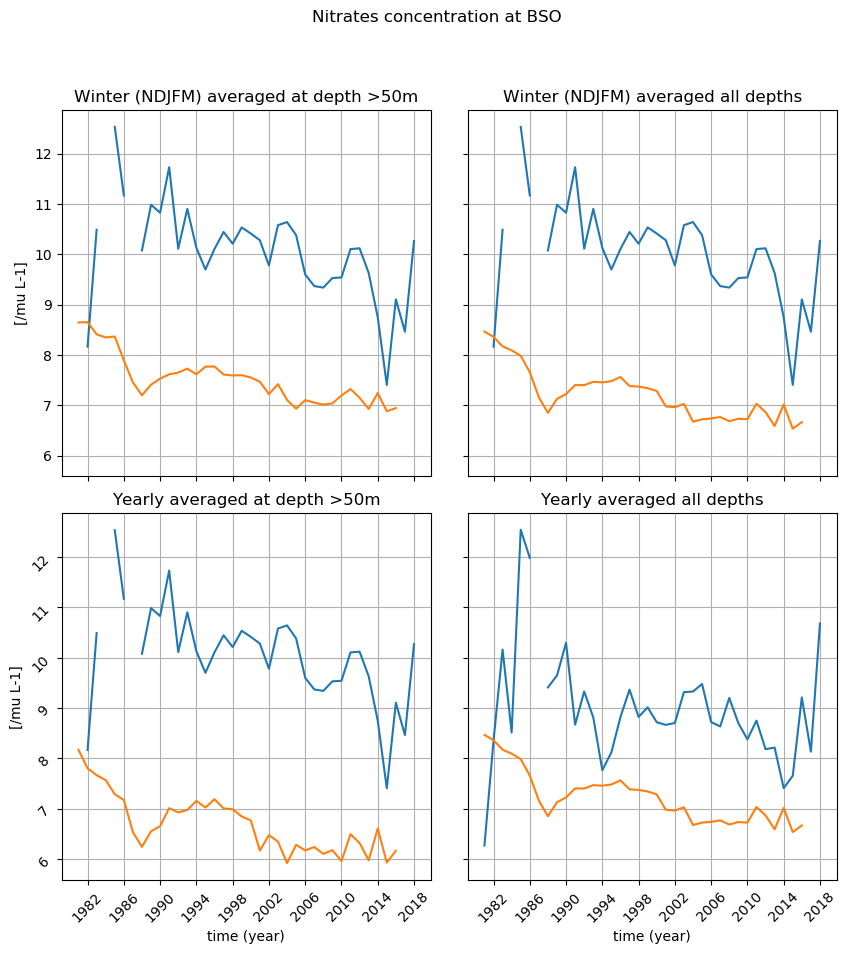

In [70]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True,
                        gridspec_kw={'hspace': 0.1, 'wspace': 0.1},figsize=(10, 10))
plt.style.use('default')
fig.suptitle('Nitrates concentration at BSO')

ax1.plot(df_obs_winter_50_500m.N)
ax1.plot(df_model_winter.DIN_50_500m)
ax1.set_ylabel('[/mu L-1]')
ax1.grid(True)
#ax1.set_ylim(8,13)
ax1.title.set_text('Winter (NDJFM) averaged at depth >50m')


ax2.plot(df_obs_winter_alldepth.N)
ax2.plot(df_model_winter.DIN_ALL_DEPTHS)
ax2.grid(True)
ax2.title.set_text('Winter (NDJFM) averaged all depths')

ax3.plot(df_obs_winter_0_50m.N)
ax3.plot(df_model_winter.DIN_0_50m)
ax3.set_xlabel('time (year)')
ax3.set_ylabel('[/mu L-1]')
ax3.tick_params(labelrotation=45)
ax3.grid(True)
ax3.title.set_text('Yearly averaged at depth >50m')

ax4.plot(df_obs_yearly_50_500m.N)
ax4.plot(df_model_yearly.DIN_ALL_DEPTHS)
ax4.set_xlabel('time (year)')
ax4.tick_params(labelrotation=45)
ax4.grid(True)
ax4.title.set_text('Yearly averaged all depths')

plt.savefig(savepath+'BSO_nitrates_obs_vs_model.png', dpi = 150, bbox_inches='tight') 
      

# plot DSI

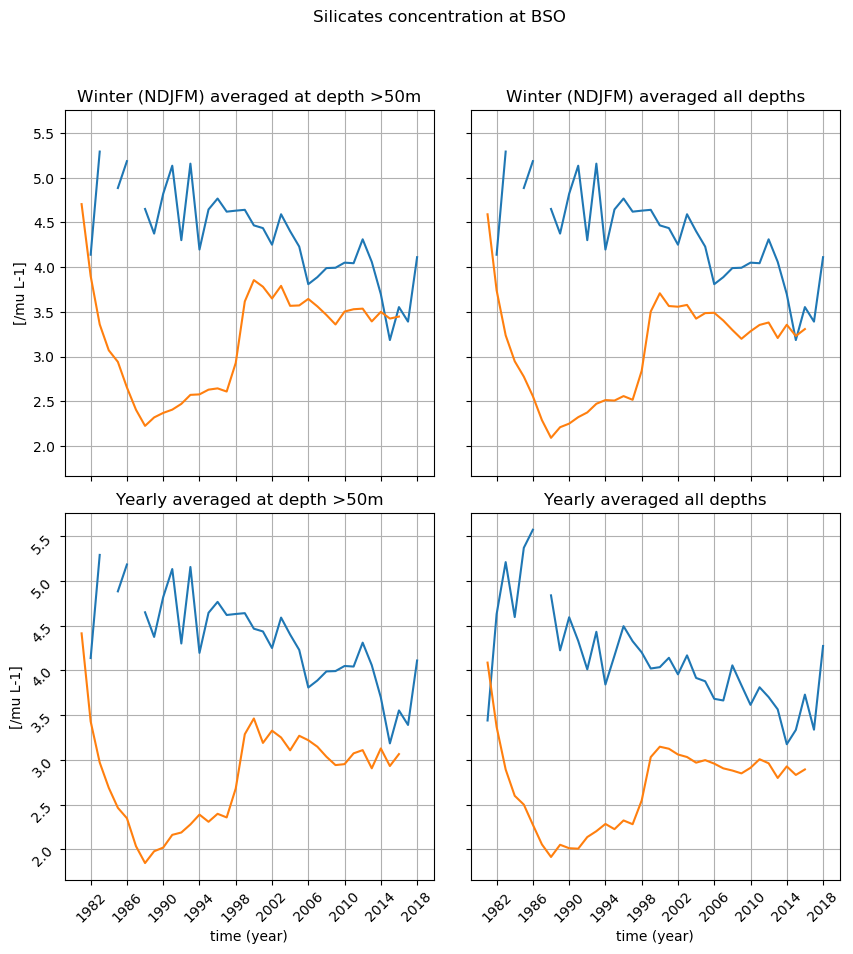

In [71]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True,
                        gridspec_kw={'hspace': 0.1, 'wspace': 0.1},figsize=(10, 10))
plt.style.use('default')
fig.suptitle('Silicates concentration at BSO')

ax1.plot(df_obs_winter_50_500m.Si)
ax1.plot(df_model_winter.DSI_50_500m)
ax1.set_ylabel('[/mu L-1]')
ax1.grid(True)
#ax1.set_ylim(8,13)
ax1.title.set_text('Winter (NDJFM) averaged at depth >50m')


ax2.plot(df_obs_winter_alldepth.Si)
ax2.plot(df_model_winter.DSI_ALL_DEPTHS)
ax2.grid(True)
ax2.title.set_text('Winter (NDJFM) averaged all depths')

ax3.plot(df_obs_winter_0_50m.Si)
ax3.plot(df_model_winter.DSI_0_50m)
ax3.set_xlabel('time (year)')
ax3.set_ylabel('[/mu L-1]')
ax3.tick_params(labelrotation=45)
ax3.grid(True)
ax3.title.set_text('Yearly averaged at depth >50m')

ax4.plot(df_obs_yearly_50_500m.Si)
ax4.plot(df_model_yearly.DSI_ALL_DEPTHS)
ax4.set_xlabel('time (year)')
ax4.tick_params(labelrotation=45)
ax4.grid(True)
ax4.title.set_text('Yearly averaged all depths')

plt.savefig(savepath+'BSO_silicates_obs_vs_model.png', dpi = 150, bbox_inches='tight') 
      